# Data Preparation & Visualisation Tasks

Discuss in detail the process of acquiring your raw data, detailing the positive and/or negative aspects of your research and acquisition. This should include the relevance and implications of any and all licensing/permissions associated with the data. 

Input Files One & Two Source: [Irish Data](https://data.gov.ie/organization/transport-infrastructure-ireland)

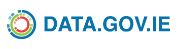

In [1]:
from IPython.display import Image
Image(filename =r'data_gov_ie.JPG', width = 200, height = 200)

Irish data is available under the [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/)

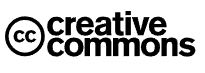

In [2]:
# Creative Commons Attribution Logo
Image(filename =r'creative_commons.JPG', width = 100, height = 100)

Input File Three's Source: [UK Data](https://www.codecademy.com/pages/contribute-docs)

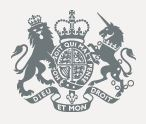

In [3]:
# Source for UK data
Image(filename =r'crown_copyright.JPG', width = 200, height = 200)

UK data is available under the [Open Government Licence v3.0](https://www.nationalarchives.gov.uk/doc/open-government-licence/version/3/)

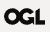

In [4]:
# Open Government Licence Logo
Image(filename =r'open_government_licence.JPG', width = 100, height = 100)

Exploratory Data Analysis helps to identify patterns, inconsistencies, anomalies, missing data, and other attributes and issues in data sets so problems can be addressed. Evaluate your raw data and detail, in depth, the various attributes and issues that you find. Your evaluation should reference evidence to support your  chosen methodology and use visualizations to illustrate your findings.

### Steps Taken for Successful Exploratory Data Analysis

###### EDA Step 1. Importing the required libraries for EDA
###### EDA Step 2. Loading the data into the data frame.
###### EDA Step 3. Checking the types of data
###### EDA Step 4. Dropping irrelevant columns
###### EDA Step 5. Renaming the columns
###### EDA Step 6. Dropping the duplicate rows
###### EDA Step 7. Dropping the missing or null values.
###### EDA Step 8. Detecting Outliers
###### EDA Step 9. Plot different features against one another

In [5]:
# EDA Step 1. Importing the required libraries for EDA
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline
sns.set(color_codes=True)

## Programming for DA Tasks

#### 2.	Data structures

###### You are required to gather and process data that has been stored in at least two distinct formats. For example, this can be data in a CSV file, from a MySQL database or from a web API in JSON format. 

###### File One: Luas total passengers by week
###### File One Type: csv
###### File Two: Luas total passengers by month
###### File Two Type: json
###### File Three: Passenger journeys on light rail, trams and undergrounds by system: Great Britain (GB)
###### File Three Type: ods

In [6]:
# EDA Step 2. Loading the data into the data frame.
df_luas_totals_all_data = pd.read_csv(r"C:\Users\stphn\Documents\CCT\Assessment\CA2\TII03.20240108183001.csv")

In [7]:
# display the first 5 rows of the dataframe
df_luas_totals_all_data.head(5)

,STATISTIC,Statistic Label,TLIST(W1),Week,C03132V03784,Luas Line,UNIT,VALUE
0,TII03C01,Passenger Journeys,2019W01,2019 Week 01,-,All Luas lines,Number,549533.0
1,TII03C01,Passenger Journeys,2019W01,2019 Week 01,1,Red line,Number,274139.0
2,TII03C01,Passenger Journeys,2019W01,2019 Week 01,2,Green line,Number,275394.0
3,TII03C01,Passenger Journeys,2019W02,2019 Week 02,-,All Luas lines,Number,839022.0
4,TII03C01,Passenger Journeys,2019W02,2019 Week 02,1,Red line,Number,408199.0


In [8]:
# display the last 5 rows
df_luas_totals_all_data.tail(5)

,STATISTIC,Statistic Label,TLIST(W1),Week,C03132V03784,Luas Line,UNIT,VALUE
775,TII03C01,Passenger Journeys,2023W47,2023 Week 47,1,Red line,Number,465137.0
776,TII03C01,Passenger Journeys,2023W47,2023 Week 47,2,Green line,Number,452163.0
777,TII03C01,Passenger Journeys,2023W48,2023 Week 48,-,All Luas lines,Number,1084541.0
778,TII03C01,Passenger Journeys,2023W48,2023 Week 48,1,Red line,Number,556742.0
779,TII03C01,Passenger Journeys,2023W48,2023 Week 48,2,Green line,Number,527799.0


In [9]:
# EDA Step 3. Checking the types of data
df_luas_totals_all_data.dtypes

STATISTIC           object
Statistic Label     object
TLIST(W1)           object
Week                object
C03132V03784        object
Luas Line           object
UNIT                object
VALUE              float64
dtype: object

In [10]:
df_luas_totals_all_data.shape

(780, 8)

In [11]:
# EDA Step 4. Dropping irrelevant columns
df_luas_totals = df_luas_totals_all_data.drop(['STATISTIC', 'Statistic Label', 'UNIT'], axis=1)
df_luas_totals.head(5)

,TLIST(W1),Week,C03132V03784,Luas Line,VALUE
0,2019W01,2019 Week 01,-,All Luas lines,549533.0
1,2019W01,2019 Week 01,1,Red line,274139.0
2,2019W01,2019 Week 01,2,Green line,275394.0
3,2019W02,2019 Week 02,-,All Luas lines,839022.0
4,2019W02,2019 Week 02,1,Red line,408199.0


In [12]:
# EDA Step 5. Renaming the column names
df_luas_totals = df_luas_totals.rename(columns={"TLIST(W1)": "TLIST", "C03132V03784": "ID"})
df_luas_totals.head(5)

,TLIST,Week,ID,Luas Line,VALUE
0,2019W01,2019 Week 01,-,All Luas lines,549533.0
1,2019W01,2019 Week 01,1,Red line,274139.0
2,2019W01,2019 Week 01,2,Green line,275394.0
3,2019W02,2019 Week 02,-,All Luas lines,839022.0
4,2019W02,2019 Week 02,1,Red line,408199.0


In [13]:
# EDA Step 6. Dropping the duplicate rows
df_luas_totals.shape # Returns total number of rows and columns

(780, 5)

In [14]:
# find number of rows containing duplicate data
duplicate_rows_df = df_luas_totals[df_luas_totals.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 5)


In [15]:
# count the number of rows before removing the data
df_luas_totals.count()

TLIST        780
Week         780
ID           780
Luas Line    780
VALUE        771
dtype: int64

In [16]:
# drop duplicates
df_luas_totals = df_luas_totals.drop_duplicates()
df_luas_totals.head(5)

,TLIST,Week,ID,Luas Line,VALUE
0,2019W01,2019 Week 01,-,All Luas lines,549533.0
1,2019W01,2019 Week 01,1,Red line,274139.0
2,2019W01,2019 Week 01,2,Green line,275394.0
3,2019W02,2019 Week 02,-,All Luas lines,839022.0
4,2019W02,2019 Week 02,1,Red line,408199.0


In [17]:
# count the number of rows after removing duplicate data
df_luas_totals.count()

TLIST        780
Week         780
ID           780
Luas Line    780
VALUE        771
dtype: int64

In [18]:
# EDA Step 7. Dropping the missing or null values.
print(df_luas_totals.isnull().sum()) # count nulls before dropping

TLIST        0
Week         0
ID           0
Luas Line    0
VALUE        9
dtype: int64


In [19]:
# drop null values
df_luas_totals = df_luas_totals.dropna()
df_luas_totals.count()

TLIST        771
Week         771
ID           771
Luas Line    771
VALUE        771
dtype: int64

In [20]:
print(df_luas_totals.isnull().sum()) # count nulls after being dropped

TLIST        0
Week         0
ID           0
Luas Line    0
VALUE        0
dtype: int64


Text(0.5, 1.0, 'Detecting Outliers From VALUE Column')

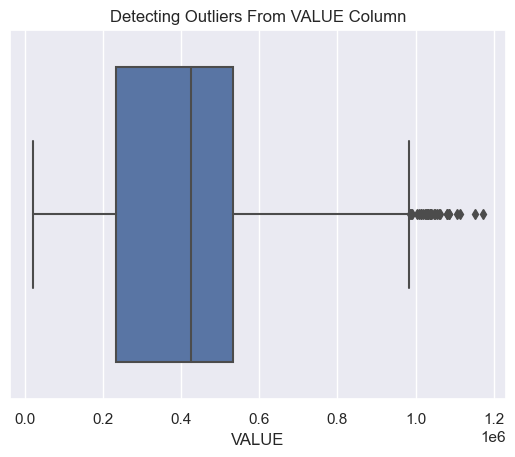

In [21]:
# EDA Step 8. Detecting Outliers
# the seaborn boxplot is a very basic plot. 
# boxplots are used to visualize distributions.
sns.boxplot(x=df_luas_totals['VALUE'])
plt.title("Detecting Outliers From VALUE Column")

In [22]:
# the interquartile range needs text values dropped from datafrane to remove error warning 
df_luas_totals = df_luas_totals.drop(["TLIST", "Luas Line"], axis=1)
df_luas_totals.head()

,Week,ID,VALUE
0,2019 Week 01,-,549533.0
1,2019 Week 01,1,274139.0
2,2019 Week 01,2,275394.0
3,2019 Week 02,-,839022.0
4,2019 Week 02,1,408199.0


In [23]:
# the column Week has three values per row. we need to split these values into three columns
# https://www.geeksforgeeks.org/split-a-text-column-into-two-columns-in-pandas-dataframe/   
df_luas_totals[['Year','Week2','WeekNo']] = df_luas_totals.Week.str.split(expand=True) # Adding three new columns to the existing dataframe. 
  
print("\n After adding two new columns : \n", df_luas_totals) # print the dataframe to see newly added columns


 After adding two new columns : 
              Week ID      VALUE  Year Week2 WeekNo
0    2019 Week 01  -   549533.0  2019  Week     01
1    2019 Week 01  1   274139.0  2019  Week     01
2    2019 Week 01  2   275394.0  2019  Week     01
3    2019 Week 02  -   839022.0  2019  Week     02
4    2019 Week 02  1   408199.0  2019  Week     02
..            ... ..        ...   ...   ...    ...
775  2023 Week 47  1   465137.0  2023  Week     47
776  2023 Week 47  2   452163.0  2023  Week     47
777  2023 Week 48  -  1084541.0  2023  Week     48
778  2023 Week 48  1   556742.0  2023  Week     48
779  2023 Week 48  2   527799.0  2023  Week     48

[771 rows x 6 columns]


In [24]:
df_luas_totals.head()

,Week,ID,VALUE,Year,Week2,WeekNo
0,2019 Week 01,-,549533.0,2019,Week,01
1,2019 Week 01,1,274139.0,2019,Week,01
2,2019 Week 01,2,275394.0,2019,Week,01
3,2019 Week 02,-,839022.0,2019,Week,02
4,2019 Week 02,1,408199.0,2019,Week,02


In [25]:
# for the interquartile range to run without error warning the dataframe values need to be numeric
df_luas_totals = df_luas_totals.drop(["Week", "Week2"], axis=1) # drop columns containg text only
df_luas_totals.head()

,ID,VALUE,Year,WeekNo
0,-,549533.0,2019,01
1,1,274139.0,2019,01
2,2,275394.0,2019,01
3,-,839022.0,2019,02
4,1,408199.0,2019,02


In [26]:
# replace dash in ID column for zero
# https://www.geeksforgeeks.org/python-pandas-dataframe-replace/
# zero all lines
# one red line
# two green line
df_luas_totals = df_luas_totals.replace('-', 0)
df_luas_totals.head()

,ID,VALUE,Year,WeekNo
0,0,549533.0,2019,01
1,1,274139.0,2019,01
2,2,275394.0,2019,01
3,0,839022.0,2019,02
4,1,408199.0,2019,02


In [27]:
# change the order of dataFrame columns
# https://www.geeksforgeeks.org/change-the-order-of-a-pandas-dataframe-columns-in-python/
df_luas_totals = df_luas_totals.iloc[:,[2,3,0,1]]
df_luas_totals.head()

,Year,WeekNo,ID,VALUE
0,2019,01,0,549533.0
1,2019,01,1,274139.0
2,2019,01,2,275394.0
3,2019,02,0,839022.0
4,2019,02,1,408199.0


In [28]:
# change Data Type of columns
# https://www.geeksforgeeks.org/change-data-type-for-one-or-more-columns-in-pandas-dataframe/
# using dictionary to convert specific columns
convert_dict = {'Year': int,
                'WeekNo': int,
                'ID': int,
                'VALUE': int,
                }
 
df_luas_totals = df_luas_totals.astype(convert_dict)
print(df_luas_totals.dtypes)

Year      int32
WeekNo    int32
ID        int32
VALUE     int32
dtype: object


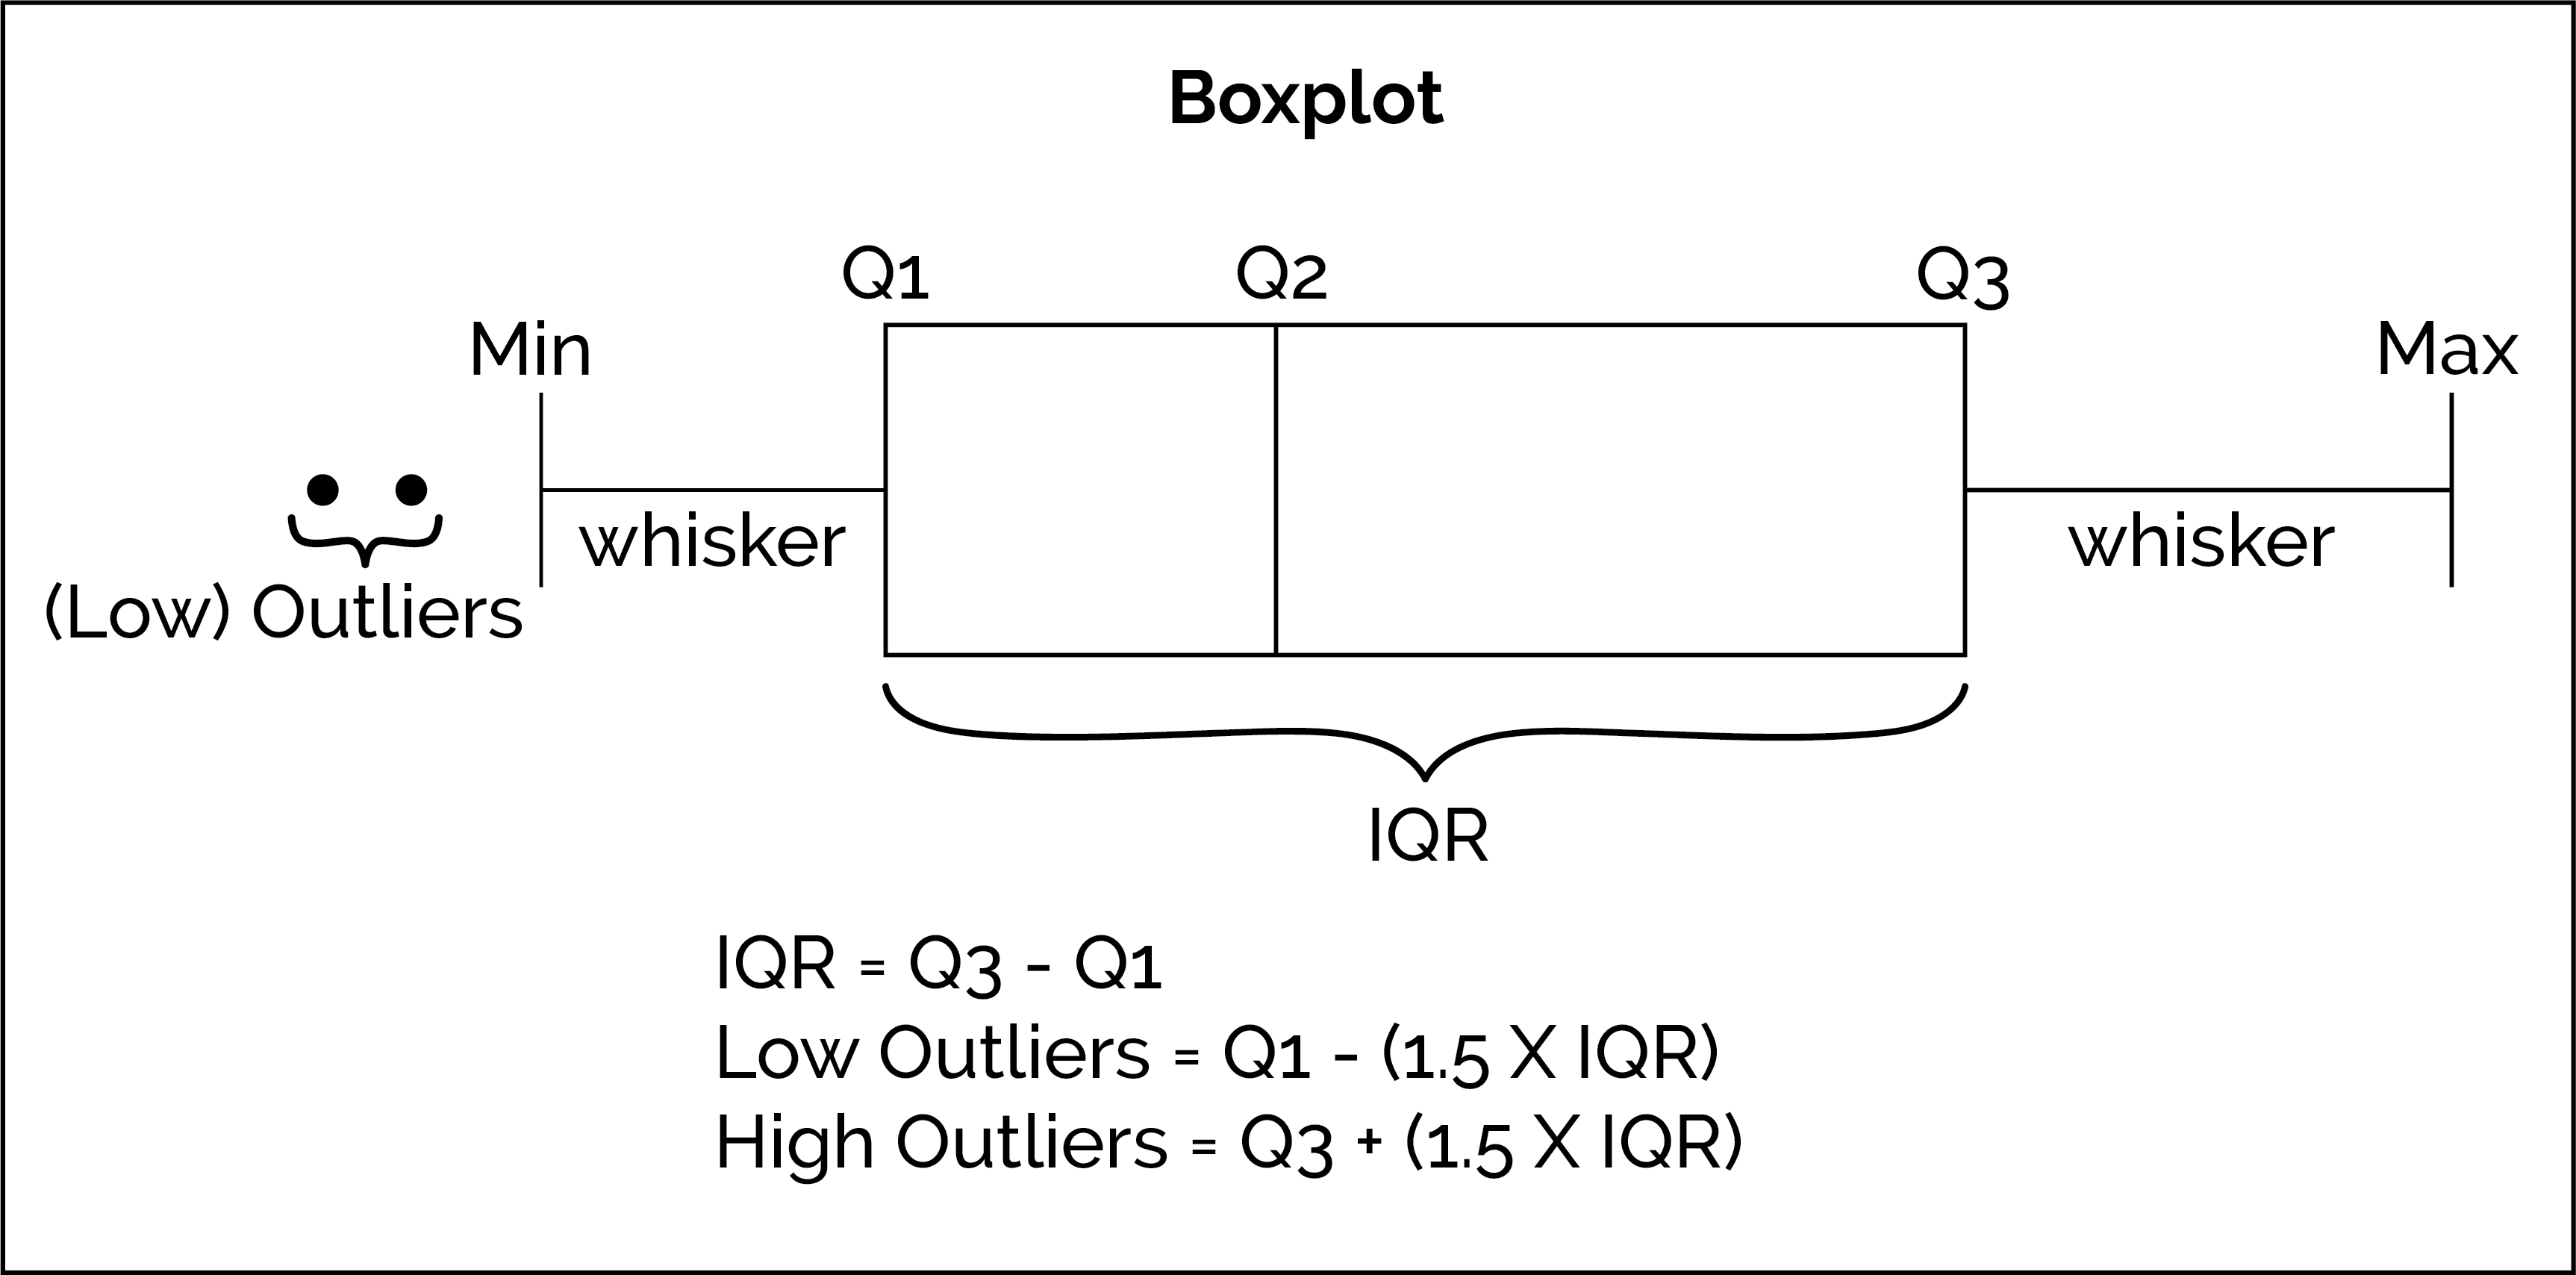

In [29]:
Image(filename =r'Boxplot-WebG.png', width = 500, height = 300)

In [30]:
# the IQR is the value of Q3 - Q1. The IQR tells us the range of the middle 50% of the data.
Q1 = df_luas_totals.quantile(0.25)
Q3 = df_luas_totals.quantile(0.75)
IQR = Q3-Q1
print(IQR)

Year           2.0
WeekNo        26.0
ID             2.0
VALUE     300446.5
dtype: float64


In [31]:
# perform count before running code for the interquartile range
df_luas_totals.shape # (771, 4)

(771, 4)

In [32]:
# the program will use these values to remove our outliers. 
# the code is commented out as the outliers are actual passenger numbers and accurate
# it's just important to know how to use this technique.
#df_just_values = df_just_values[~((df_just_values < (Q1-1.5 * IQR)) |(df_just_values > (Q3 + 1.5 * IQR))).any(axis=1)]
df_luas_totals.shape # (771, 4)

(771, 4)

In [33]:
df_luas_totals.tail()

,Year,WeekNo,ID,VALUE
775,2023,47,1,465137
776,2023,47,2,452163
777,2023,48,0,1084541
778,2023,48,1,556742
779,2023,48,2,527799


Text(0.5, 1.0, 'Total Passengers For Each Line by Year')

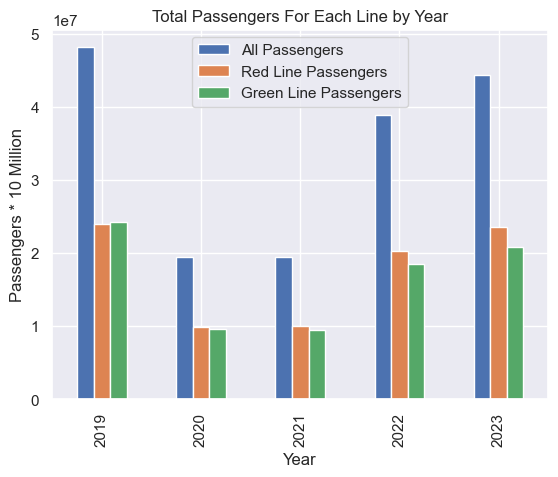

In [34]:
# EDA Step 9. Plot different features against one another
# https://www.statology.org/pandas-sum-column-with-condition/
# https://www.w3schools.com/python/numpy/numpy_creating_arrays.asp
all_passengers_2019 = df_luas_totals.loc[(df_luas_totals['Year'] == 2019) & (df_luas_totals['ID'] == 0), 'VALUE'].sum()
all_passengers_2020 = df_luas_totals.loc[(df_luas_totals['Year'] == 2020) & (df_luas_totals['ID'] == 0), 'VALUE'].sum()
all_passengers_2021 = df_luas_totals.loc[(df_luas_totals['Year'] == 2021) & (df_luas_totals['ID'] == 0), 'VALUE'].sum()
all_passengers_2022 = df_luas_totals.loc[(df_luas_totals['Year'] == 2022) & (df_luas_totals['ID'] == 0), 'VALUE'].sum()
all_passengers_2023 = df_luas_totals.loc[(df_luas_totals['Year'] == 2023) & (df_luas_totals['ID'] == 0), 'VALUE'].sum()
all_arr = np.array([all_passengers_2019, all_passengers_2020, all_passengers_2021, all_passengers_2022, all_passengers_2023])

red_passengers_2019 = df_luas_totals.loc[(df_luas_totals['Year'] == 2019) & (df_luas_totals['ID'] == 1), 'VALUE'].sum()
red_passengers_2020 = df_luas_totals.loc[(df_luas_totals['Year'] == 2020) & (df_luas_totals['ID'] == 1), 'VALUE'].sum()
red_passengers_2021 = df_luas_totals.loc[(df_luas_totals['Year'] == 2021) & (df_luas_totals['ID'] == 1), 'VALUE'].sum()
red_passengers_2022 = df_luas_totals.loc[(df_luas_totals['Year'] == 2022) & (df_luas_totals['ID'] == 1), 'VALUE'].sum()
red_passengers_2023 = df_luas_totals.loc[(df_luas_totals['Year'] == 2023) & (df_luas_totals['ID'] == 1), 'VALUE'].sum()
red_arr = np.array([red_passengers_2019, red_passengers_2020, red_passengers_2021, red_passengers_2022, red_passengers_2023])

green_passengers_2019 = df_luas_totals.loc[(df_luas_totals['Year'] == 2019) & (df_luas_totals['ID'] == 2), 'VALUE'].sum()
green_passengers_2020 = df_luas_totals.loc[(df_luas_totals['Year'] == 2020) & (df_luas_totals['ID'] == 2), 'VALUE'].sum()
green_passengers_2021 = df_luas_totals.loc[(df_luas_totals['Year'] == 2021) & (df_luas_totals['ID'] == 2), 'VALUE'].sum()
green_passengers_2022 = df_luas_totals.loc[(df_luas_totals['Year'] == 2022) & (df_luas_totals['ID'] == 2), 'VALUE'].sum()
green_passengers_2023 = df_luas_totals.loc[(df_luas_totals['Year'] == 2023) & (df_luas_totals['ID'] == 2), 'VALUE'].sum()
green_arr = np.array([green_passengers_2019, green_passengers_2020, green_passengers_2021, green_passengers_2022, green_passengers_2023])

# Create a sample dataframe with an text index
plotdata = pd.DataFrame({
    "All Passengers":all_arr,
    "Red Line Passengers":red_arr,
    "Green Line Passengers":green_arr
    }, 
    index = df_luas_totals.Year.unique()
)
plotdata.plot(kind="bar")
plt.xlabel("Year")
plt.ylabel("Passengers * 10 Million")
plt.title("Total Passengers For Each Line by Year")

In [35]:
# merge arrays into single array
# https://www.w3schools.com/python/numpy/numpy_array_join.asp
new_arr = np.array([all_arr, red_arr, green_arr])

# convert numphy array to dataframe
# https://www.geeksforgeeks.org/create-a-dataframe-from-a-numpy-array-and-specify-the-index-column-and-column-headers/
# creating a list of index names 
index_values = ['All', 'Red', 'Green'] 
   
# creating a list of column names 
column_values = ['2019', '2020', '2021', 
                '2022', '2023'] 
  
# creating the dataframe 
df_formatted_luas_totals = pd.DataFrame(data = new_arr,  
                  index = index_values,  
                  columns = column_values) 
  
# displaying the dataframe 
print(df_formatted_luas_totals)

           2019      2020      2021      2022      2023
All    48148506  19397972  19511557  38854633  44344608
Red    23945608   9840431  10057708  20319692  23544813
Green  24202898   9557549   9453850  18534942  20799794


Text(0.5, 1.0, 'Total Passengers For Each Line by Year')

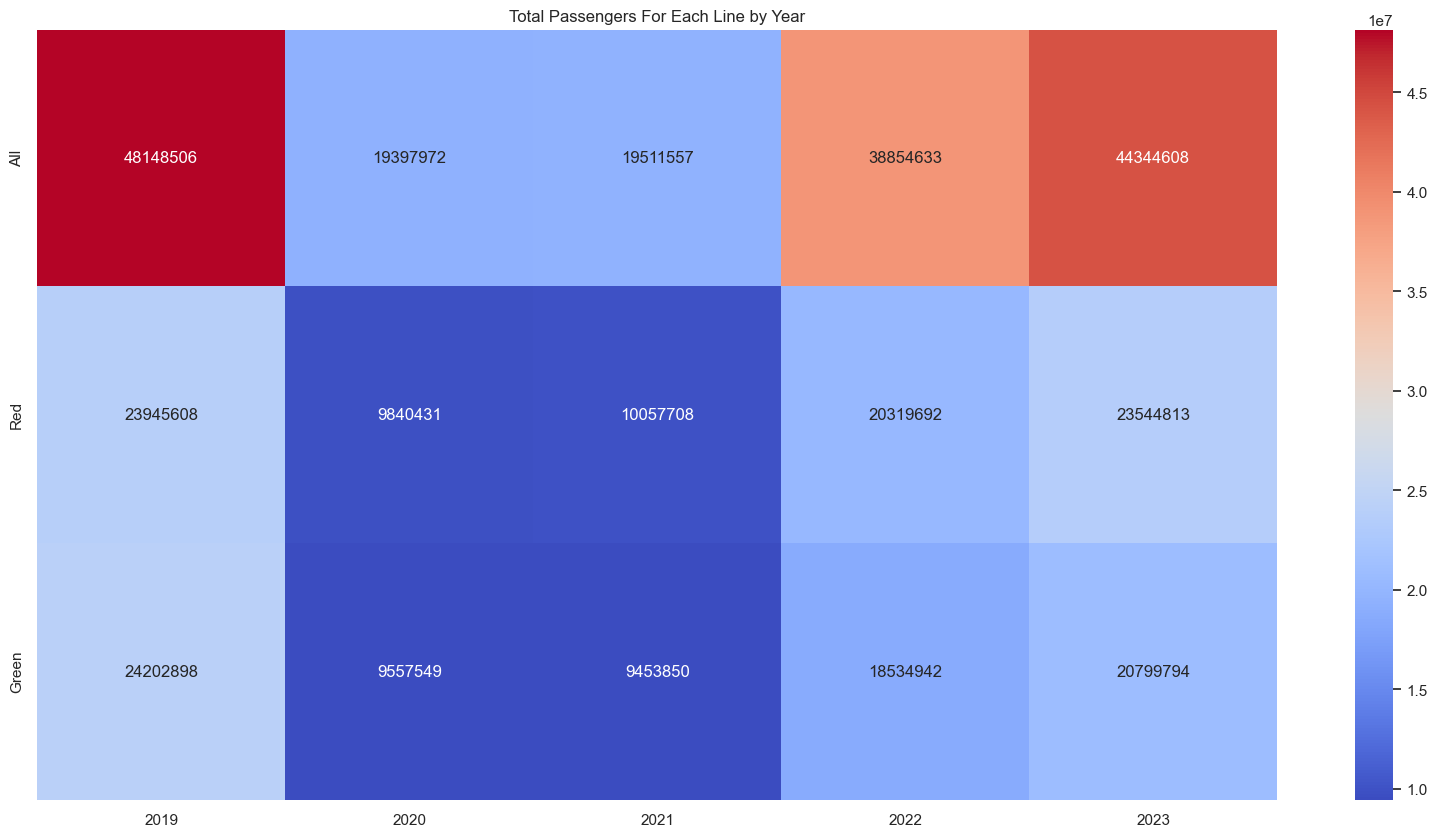

In [36]:
# Finding the relations between the variables.
plt.figure(figsize=(20,10))
sns.heatmap(df_formatted_luas_totals,cmap="coolwarm", annot=True, fmt="1")
#c
#add title
plt.title('Total Passengers For Each Line by Year')

###### File Two: Luas total passengers by month
###### File Two Type: json

In [37]:
# EDA Step 1. Importing the required libraries for EDA
import json

In [38]:
# EDA Step 2. Loading the data into the data frame
# https://www.tutorialspoint.com/how-to-read-json-file-in-python
# returns JSON object as a dictionary
with open(r"C:\Users\stphn\Documents\CCT\Assessment\CA2\TOA11.json") as f:
   json_data = json.load(f)

#print(json_data) # print file contents to check correct file has been hooked


In [39]:
# drill into file to find required data
#print(json_data["dataset"]['value']) # check for the correct values - should only print total passenger numbers
lusa_total_passengers_json_data = json_data["dataset"]['value'] # populate list with numeric values (total passengers) from the json


#print(json_data["dataset"]['dimension']['STATISTIC']['category']['label']) # returns the following sting{'TOA11C01': 'Red line', 'TOA11C02': 'Green line', 'TOA11C03': 'All Luas lines'}
line_name_1 = json_data["dataset"]['dimension']['STATISTIC']['category']['label']['TOA11C01'] # Red line
line_name_2 = json_data["dataset"]['dimension']['STATISTIC']['category']['label']['TOA11C02'] # Green line
line_name_3 = json_data["dataset"]['dimension']['STATISTIC']['category']['label']['TOA11C03'] # All Luas lines
line_names_list = [line_name_1, line_name_1, line_name_1, line_name_1, line_name_1,
                   line_name_2, line_name_2, line_name_2, line_name_2, line_name_2,
                   line_name_3, line_name_3, line_name_3, line_name_3, line_name_3]
#line_names_list # check for the correct line names and that the list has been populated correctly


# navigate through json to get to year values
year_2018 = json_data["dataset"]['dimension']['TLIST(A1)']['category']['label']['2018'] # 2018
year_2019 = json_data["dataset"]['dimension']['TLIST(A1)']['category']['label']['2019'] # 2019
year_2020 = json_data["dataset"]['dimension']['TLIST(A1)']['category']['label']['2020'] # 2020
year_2021 = json_data["dataset"]['dimension']['TLIST(A1)']['category']['label']['2021'] # 2021
year_2022 = json_data["dataset"]['dimension']['TLIST(A1)']['category']['label']['2022'] # 2022
#print("The JSON data shows values for years: {}, {}, {}, {}, {}.".format(year_2018,year_2019,year_2020,year_2021,year_2022))

years_list = [year_2018, year_2019, year_2020, year_2021, year_2022,
              year_2018, year_2019, year_2020, year_2021, year_2022,
              year_2018, year_2019, year_2020, year_2021, year_2022]
#years_list # check for the correct years and that the list has been populated correctly

## Programming for DA Tasks
#### 4. Testing & Optimisation
#### 5.	Data manipulation

###### The below cell is a test to see the correct data being extracted from the json file
###### The below cell also shows the extracted data being manipulated by being concatenated to form a string

In [40]:
label = json_data["dataset"]['label']
source = json_data["dataset"]['source']
updated = json_data["dataset"]['updated']

# https://www.freecodecamp.org/news/python-print-variable-how-to-print-a-string-and-variable/
print("The JSON data shows: {}.\nThe data was sourced from: {}.\nThe data was last updated on: {}.".format(label,source,updated))

The JSON data shows: Luas Passenger Numbers.
The data was sourced from: Transport Infrastructure Ireland.
The data was last updated on: 2023-11-22T11:00:00Z.


In [41]:
# count the number values inside the list of total passenger values
json_values_list_size = len(lusa_total_passengers_json_data)
print(json_values_list_size) # expected result is: 195 as there are 195 values inside json

195


In [42]:
# Red line 2018 All months 21837268 - Element 12
# Red line 2019 All months 24045744 - Element 25
# Red line 2020 All months 9727187 - Element 38
# Red line 2021 All months 10040293 - Element 51
# Red line 2022 All months 20275074 - Element 64
# Green line 2018 All months 19999700 - Element 77
# Green line 2019 All months 24301487 - Element 90
# Green line 2020 All months 9448869 - Element 103
# Green line 2021 All months 9441025 - Element 116
# Green line 2022 All months 18392801 - Element 129
# All Luas lines 2018 All months 41836968 - Element 142
# All Luas lines 2019 All months 48347231 - Element 155
# All Luas lines 2020 All months 19176056 - Element 168
# All Luas lines 2021 All months 19481318 - Element 181
# All Luas lines 2022 All months 38667875 - Element 194

# extract the year total for each line from the list  holding all the total values
# https://www.askpython.com/python/list/extract-elements-python-list
#print([lusa_total_passengers_json_data[i] for i in (12,25,38,51,64,77,90,103,116,129,142,155,168,181,194)])
lusa_total_passengers_json_data = [lusa_total_passengers_json_data[i] for i in (12,25,38,51,64,77,90,103,116,129,142,155,168,181,194)]
#lusa_total_passengers_json_data

In [43]:
# convert List from Float to Integer using NumPy Array
# https://statisticsglobe.com/convert-list-float-integer-python
lusa_total_passengers_json_data = list(map(int, lusa_total_passengers_json_data))
print(lusa_total_passengers_json_data)

[21837268, 24045744, 9727187, 10040293, 20275074, 19999700, 24301487, 9448869, 9441025, 18392801, 41836968, 48347231, 19176056, 19481318, 38667875]


In [44]:
# Programming for DA Tasks - 4. Testing & Optimisation 
# check if list are identical using sort() + == operator
 
# initializing lists
#test_list1 = lusa_total_passengers_json_data
#test_list2 = [21837268, 24045744, 9727187, 10040293, 20275074, 19999700, 24301487, 9448869, 9441025, 18392801, 41836968, 48347231, 19176056, 19481318, 38667875]
# 
## printing lists
##print("Extracted List : " + str(test_list1))
#print("Hard coded list : " + str(test_list2))
# 
## sorting both the lists
#test_list1.sort()
#test_list2.sort()
# 
## using == to check if lists are equal
#if test_list1 == test_list2:
#    print("The lists are identical")
#else:
#    print("The lists are not identical")

In [45]:
print(lusa_total_passengers_json_data)

[21837268, 24045744, 9727187, 10040293, 20275074, 19999700, 24301487, 9448869, 9441025, 18392801, 41836968, 48347231, 19176056, 19481318, 38667875]


In [46]:
# Programming for DA Tasks - 5. Data manipulation 
# three list have been created and populated with data from the json file
# convert the three lists into a dataframe
# https://www.geeksforgeeks.org/create-a-pandas-dataframe-from-lists/

# dictionary of lists
dict = {'Line': line_names_list,
        'Year': years_list,
        'Total': lusa_total_passengers_json_data}
    
df = pd.DataFrame(dict)
    
print(df)

              Line  Year     Total
0         Red line  2018  21837268
1         Red line  2019  24045744
2         Red line  2020   9727187
3         Red line  2021  10040293
4         Red line  2022  20275074
5       Green line  2018  19999700
6       Green line  2019  24301487
7       Green line  2020   9448869
8       Green line  2021   9441025
9       Green line  2022  18392801
10  All Luas lines  2018  41836968
11  All Luas lines  2019  48347231
12  All Luas lines  2020  19176056
13  All Luas lines  2021  19481318
14  All Luas lines  2022  38667875


In [47]:
# EDA Step 3. Checking the types of data
df.dtypes

Line     object
Year     object
Total     int64
dtype: object

In [48]:
# EDA Step 4. Dropping irrelevant columns
# irrelevant columns were dropped as the data was being extracted from the json file 

In [49]:
# EDA Step 5. Renaming the columns
# the columns were renamed when the lists were converted into a dataframe

In [50]:
# EDA Step 6. Dropping the duplicate rows
# there are no duplicate rows, the dataframe was populated with specific data
# tests were ran against the collected data with hardcoded data to ensure the collected data accurate

In [51]:
# EDA Step 7. Dropping the missing or null values.
# there are no null values, the dataframe was populated with specific data

Text(0.5, 1.0, 'Detecting Outliers From Total Column')

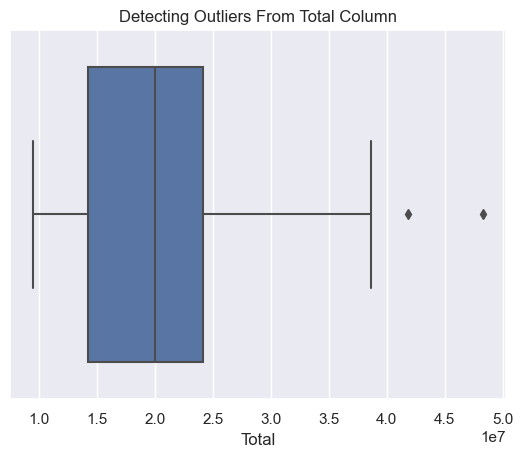

In [52]:
# EDA Step 8. Detecting Outliers
# the seaborn boxplot is a very basic plot. 
# boxplots are used to visualize distributions.
sns.boxplot(x=df['Total'])
plt.title("Detecting Outliers From Total Column")

In [53]:
# only pass numeric values to IQR to avoid runtime warnings
file_two_totals = df.drop(['Line', 'Year'], axis=1)
file_two_totals

,Total
0,21837268
1,24045744
2,9727187
3,10040293
4,20275074
5,19999700
6,24301487
7,9448869
8,9441025
9,18392801


In [54]:
# the IQR is the value of Q3 - Q1. The IQR tells us the range of the middle 50% of the data.
Q1 = file_two_totals.quantile(0.25)
Q3 = file_two_totals.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Total    9957068.5
dtype: float64


In [55]:
file_two_totals.shape # (15, 1)

(15, 1)

### Completing the IQR will remove two values from the data frame. These values are needed for a bar chart and heat map so the code to complete the IQR has been commented out

In [56]:
# the program will use these values to remove our outliers. 
# the code is commented out as the outliers are actual passenger numbers and accurate
# it's just important to know how to use this technique.
#file_two_totals = file_two_totals[~((file_two_totals < (Q1-1.5 * IQR)) | (file_two_totals > (Q3 + 1.5 * IQR))).any(axis=1)]

In [57]:
# if IQR is ran result is: (13, 1)
# else if IQR is not ran then the result is: (15, 1)
#file_two_totals.shape # (13, 1)
file_two_totals.shape # (15, 1)

(15, 1)

In [58]:
# EDA Step 9. Plot different features against one another
df

,Line,Year,Total
0,Red line,2018,21837268
1,Red line,2019,24045744
2,Red line,2020,9727187
3,Red line,2021,10040293
4,Red line,2022,20275074
5,Green line,2018,19999700
6,Green line,2019,24301487
7,Green line,2020,9448869
8,Green line,2021,9441025
9,Green line,2022,18392801


In [59]:
import array

# populate variable with dataframe values
red_arr = df['Total'].iloc[0:5] 
green_arr = df['Total'].iloc[5:10]
all_arr = df['Total'].iloc[10:15]

# convert variable to arrays to be passed to bar chart and heat map
red_arr = array.array('i', red_arr)
green_arr = array.array('i', green_arr)
all_arr = array.array('i', all_arr)

Text(0.5, 1.0, 'Total Passengers For Each Line by Year')

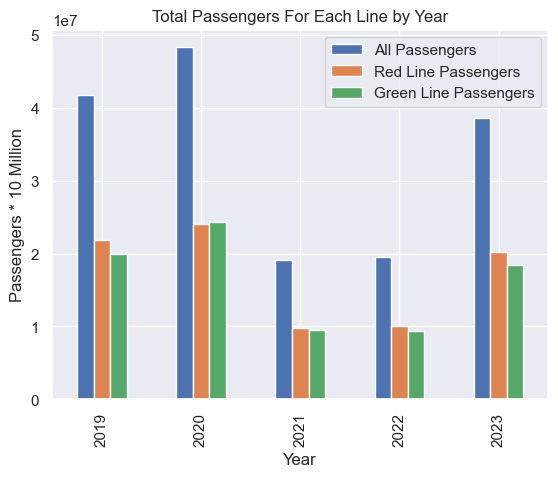

In [60]:
# Create a sample dataframe with an text index
plotdata = pd.DataFrame({
    "All Passengers":all_arr,
    "Red Line Passengers":red_arr,
    "Green Line Passengers":green_arr
    }, 
    index = df_luas_totals.Year.unique()
)
plotdata.plot(kind="bar")
plt.xlabel("Year")
plt.ylabel("Passengers * 10 Million")
plt.title("Total Passengers For Each Line by Year")

In [61]:
# merge arrays into single array
# https://www.w3schools.com/python/numpy/numpy_array_join.asp
new_arr = np.array([all_arr, red_arr, green_arr])

# convert numphy array to dataframe
# https://www.geeksforgeeks.org/create-a-dataframe-from-a-numpy-array-and-specify-the-index-column-and-column-headers/
# creating a list of index names 
index_values = ['All', 'Red', 'Green'] 
   
# creating a list of column names 
column_values = ['2018', '2019', '2020', 
                '2021', '2022'] 
  
# creating the dataframe 
df_formatted_luas_totals = pd.DataFrame(data = new_arr,  
                  index = index_values,  
                  columns = column_values) 
  
# displaying the dataframe 
print(df_formatted_luas_totals)

           2018      2019      2020      2021      2022
All    41836968  48347231  19176056  19481318  38667875
Red    21837268  24045744   9727187  10040293  20275074
Green  19999700  24301487   9448869   9441025  18392801


Text(0.5, 1.0, 'Total Passengers For Each Line by Year')

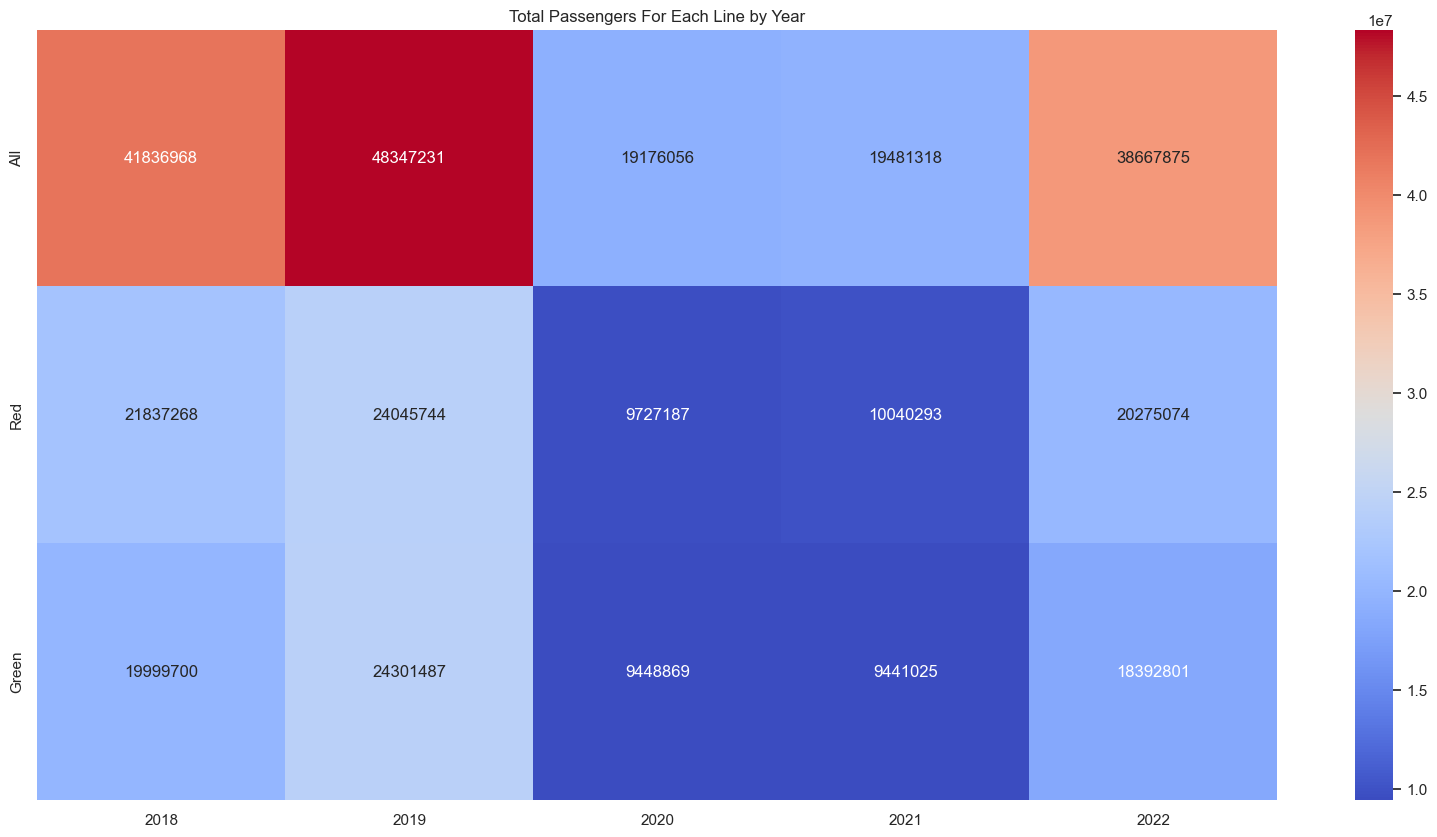

In [62]:
# finding the relations between the variables.
plt.figure(figsize=(20,10))
sns.heatmap(df_formatted_luas_totals,cmap="coolwarm", annot=True, fmt="1")
plt.title('Total Passengers For Each Line by Year') #add title

###### File Three: Passenger journeys on light rail, trams and undergrounds by system: Great Britain (GB)
###### File Three Type: ods

In [63]:
# EDA Step 1. Importing the required libraries for EDA
#!pip install odfpy


In [64]:
# EDA Step 2. Loading the data into the data frame.
# Read Excel(OpenDocument ODS) with Python Pandas 
# https://datascientyst.com/read-excel-opendocument-ods-python-pandas/

# the first 7 row are descriptive tet about the dataset
# drop the first 7 rows when reading in the file
# https://www.statology.org/pandas-read-excel-skip-rows/
df_GB_data = pd.read_excel(r"C:\Users\stphn\Documents\CCT\Assessment\CA2\lrt0101.ods", sheet_name="LRT0101", engine='odf', skiprows=7)

In [65]:
# To display the top 5 rows
df_GB_data.head()

,Financial year ending March,Docklands Light Railway,London Trams,Nottingham Express Transit,"West Midlands Metro [notes 1, 2, 4]",Sheffield Supertram,Tyne and Wear Metro,Manchester Metrolink [note 3],Blackpool Tramway,England outside of London [note 5],England [note 5],Edinburgh Trams,Great Britain [note 5],London Underground,Glasgow Subway
0,1984,[w],[w],[w],[w],[w],49.8,[w],6.2,56.0,56.0,[w],56.0,[w],12.3
1,1985,[w],[w],[w],[w],[w],57.2,[w],6.0,63.2,63.2,[w],63.2,[w],12.7
2,1986,[w],[w],[w],[w],[w],59.1,[w],6.2,65.3,65.3,[w],65.3,[w],13.1
3,1987,[w],[w],[w],[w],[w],46.4,[w],6.2,52.6,52.6,[w],52.6,[w],13.7
4,1988,[w],[w],[w],[w],[w],44.9,[w],5.4,50.3,50.3,[w],50.3,[w],13.6


In [66]:
# To display the bottom 5 rows
df_GB_data.tail(5)

,Financial year ending March,Docklands Light Railway,London Trams,Nottingham Express Transit,"West Midlands Metro [notes 1, 2, 4]",Sheffield Supertram,Tyne and Wear Metro,Manchester Metrolink [note 3],Blackpool Tramway,England outside of London [note 5],England [note 5],Edinburgh Trams,Great Britain [note 5],London Underground,Glasgow Subway
35,2019,121.8,28.7,18.8,8.3,11.9,36.4,43.7,5.2,124.4,274.8,7.5,282.3,1384,13.1
36,2020,116.8,27.2,18.7,8,10.5,33.1,44.3,4.8,119.4,263.4,7.1,270.6,1337,12.7
37,2021,39.7,11.6,3.4,3.4,2.8,9.4,10.3,1.1,30.4,81.7,0.9,82.6,296.1,2.5
38,2022,77.2,19.1,9.1,4.7,6.9,24.3,26,4.2,75.2,171.5,2.8,174.3,748,8.0
39,2023,92.3,20.9,14.4,5.4,8.4,29.3,36,4.9,98.3,211.5,5.3,216.8,1065.1,11.9


In [67]:
# EDA Step 3. Checking the types of data
df_GB_data.dtypes

Financial year ending March              int64
Docklands Light Railway                 object
London Trams                            object
Nottingham Express Transit              object
West Midlands Metro [notes 1, 2, 4]     object
Sheffield Supertram                     object
Tyne and Wear Metro                    float64
Manchester Metrolink [note 3]           object
Blackpool Tramway                      float64
England outside of London [note 5]     float64
England [note 5]                       float64
Edinburgh Trams                         object
Great Britain [note 5]                 float64
London Underground                      object
Glasgow Subway                         float64
dtype: object

In [68]:
# EDA Step 4. Dropping irrelevant columns
# drop columns that do not deal with trams (subway, underground)

# Dropping irrelevant columns
df_GB_data = df_GB_data.drop(['Docklands Light Railway', 'West Midlands Metro [notes 1, 2, 4]', 'Tyne and Wear Metro',
                              'England outside of London [note 5]', 'England [note 5]', 'Great Britain [note 5]',
                              'London Underground', 'Glasgow Subway'], axis=1)
df_GB_data.head(5)

,Financial year ending March,London Trams,Nottingham Express Transit,Sheffield Supertram,Manchester Metrolink [note 3],Blackpool Tramway,Edinburgh Trams
0,1984,[w],[w],[w],[w],6.2,[w]
1,1985,[w],[w],[w],[w],6.0,[w]
2,1986,[w],[w],[w],[w],6.2,[w]
3,1987,[w],[w],[w],[w],6.2,[w]
4,1988,[w],[w],[w],[w],5.4,[w]


In [69]:
# EDA Step 5. Renaming the columns

# Renaming the column names
df_GB_data = df_GB_data.rename(columns={"Financial year ending March": "Year", "London Trams": "London",
                                        "Nottingham Express Transit": "Nottingham", "Sheffield Supertram": "Sheffield",
                                        "Manchester Metrolink [note 3]": "Manchester", "Blackpool Tramway": "Blackpool",
                                        "Edinburgh Trams": "Edinburgh"})
df_GB_data.head(5)

,Year,London,Nottingham,Sheffield,Manchester,Blackpool,Edinburgh
0,1984,[w],[w],[w],[w],6.2,[w]
1,1985,[w],[w],[w],[w],6.0,[w]
2,1986,[w],[w],[w],[w],6.2,[w]
3,1987,[w],[w],[w],[w],6.2,[w]
4,1988,[w],[w],[w],[w],5.4,[w]


In [70]:
# EDA Step 6. Dropping the duplicate rows
# Total number of rows and columns
df_GB_data.shape

(40, 7)

In [71]:
# Rows containing duplicate data
duplicate_rows_df = df_GB_data[df_GB_data.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 7)


In [72]:
# EDA Step 7. Dropping the missing or null values.
# Finding the null values.
print(df_GB_data.isnull().sum())

Year          0
London        0
Nottingham    0
Sheffield     0
Manchester    0
Blackpool     0
Edinburgh     0
dtype: int64


In [73]:
# there are no null values found
# the dataset does state: The symbol "[w]" is used to denote no data.
# the symbol "[w]" will be replaced with zero
df_GB_data = df_GB_data.replace('[w]', 0)
df_GB_data.head()

,Year,London,Nottingham,Sheffield,Manchester,Blackpool,Edinburgh
0,1984,0.0,0.0,0.0,0.0,6.2,0.0
1,1985,0.0,0.0,0.0,0.0,6.0,0.0
2,1986,0.0,0.0,0.0,0.0,6.2,0.0
3,1987,0.0,0.0,0.0,0.0,6.2,0.0
4,1988,0.0,0.0,0.0,0.0,5.4,0.0


Text(0.5, 1.0, 'The figures in this table are presented in millions')

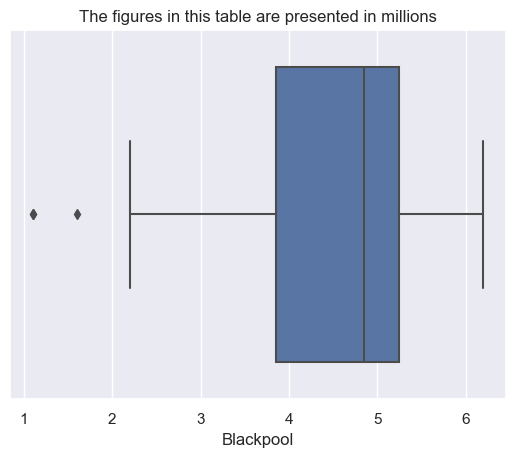

In [74]:
# EDA Step 8. Detecting Outliers

# selecting blackpool because Blackpool is the only city with values for every recorded year
# set title for boxplot
# https://stackoverflow.com/questions/42406233/how-to-add-a-title-to-a-seaborn-boxplot
sns.boxplot(x=df_GB_data['Blackpool']).set_title("The figures in this table are presented in millions")

# Will skip IQR calculations as there is no need for it
### From viewing the dataset there are no outliers that would skew/dwarf the data

In [75]:
df_GB_data.head()

,Year,London,Nottingham,Sheffield,Manchester,Blackpool,Edinburgh
0,1984,0.0,0.0,0.0,0.0,6.2,0.0
1,1985,0.0,0.0,0.0,0.0,6.0,0.0
2,1986,0.0,0.0,0.0,0.0,6.2,0.0
3,1987,0.0,0.0,0.0,0.0,6.2,0.0
4,1988,0.0,0.0,0.0,0.0,5.4,0.0


In [76]:
# drop rows for years before 2015
# years after 2015 have data for all selected cities
GB_data_year_2015_onward = df_GB_data.truncate(before=31)

In [77]:
GB_data_year_2015_onward

,Year,London,Nottingham,Sheffield,Manchester,Blackpool,Edinburgh
31,2015,30.7,8.1,11.5,31.2,4.1,4.1
32,2016,27.0,12.2,11.6,34.3,4.9,5.3
33,2017,29.5,16.4,12.6,37.8,5.1,5.8
34,2018,29.1,17.8,12.3,41.2,5.2,6.8
35,2019,28.7,18.8,11.9,43.7,5.2,7.5
36,2020,27.2,18.7,10.5,44.3,4.8,7.1
37,2021,11.6,3.4,2.8,10.3,1.1,0.9
38,2022,19.1,9.1,6.9,26.0,4.2,2.8
39,2023,20.9,14.4,8.4,36.0,4.9,5.3


In [79]:
london_arr = GB_data_year_2015_onward['London']
nottingham_arr = GB_data_year_2015_onward['Nottingham']
sheffield_arr = GB_data_year_2015_onward['Sheffield']
manchester_arr = GB_data_year_2015_onward['Manchester']
blackpool_arr = GB_data_year_2015_onward['Blackpool']
edinburgh_arr = GB_data_year_2015_onward['Edinburgh']
#edinburgh_arr

# convert variable to type float array to be passed to bar chart and heat map
# https://pythonexamples.org/python-create-a-float-array/
london_arr = array.array('f', round(london_arr, 1))
nottingham_arr = array.array('f', nottingham_arr)
sheffield_arr = array.array('f', sheffield_arr)
manchester_arr = array.array('f', manchester_arr)
blackpool_arr = array.array('f', blackpool_arr)
edinburgh_arr = array.array('f', edinburgh_arr)
#edinburgh_arr

array('f', [30.700000762939453, 27.0, 29.5, 29.100000381469727, 28.700000762939453, 27.200000762939453, 11.600000381469727, 19.100000381469727, 20.899999618530273])

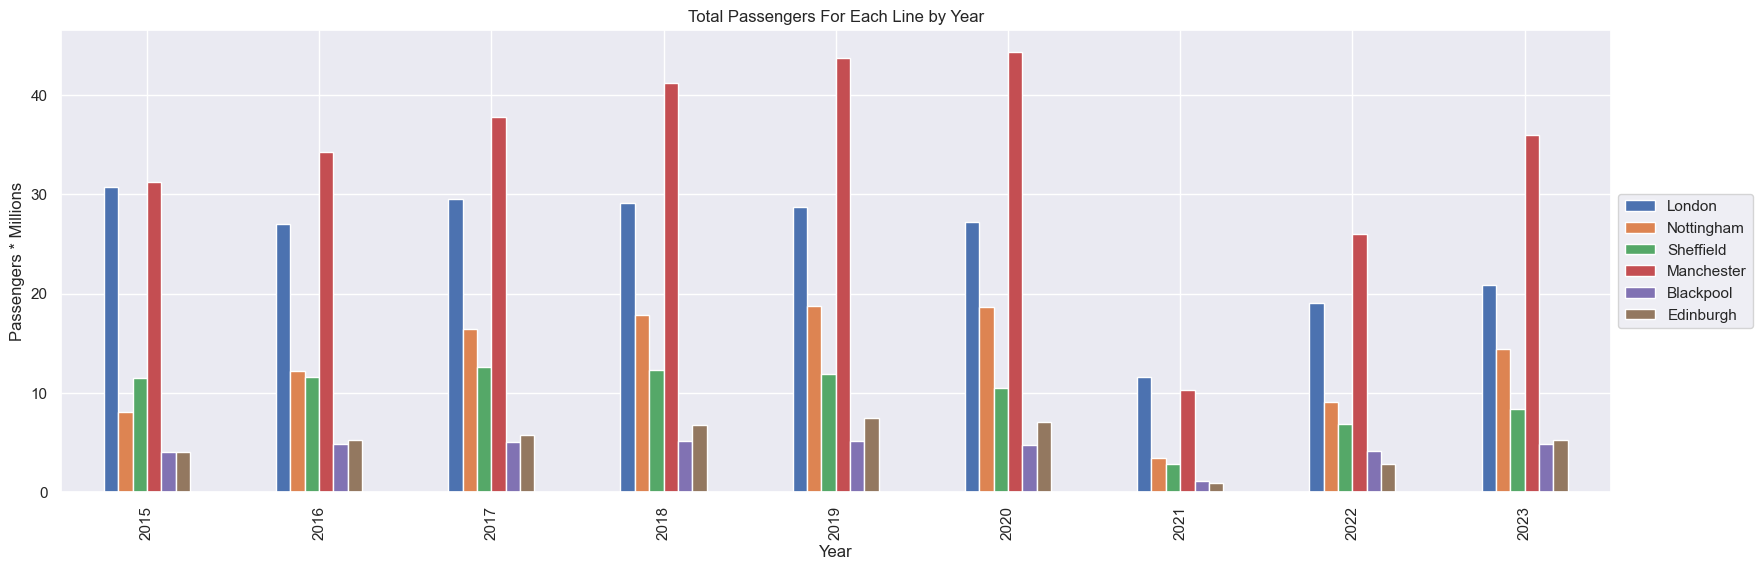

In [80]:
# EDA Step 9. Plot different features against one another

# Create a sample dataframe with an text index
plotdata = pd.DataFrame({
    "London":london_arr,
    "Nottingham":nottingham_arr,
    "Sheffield":sheffield_arr,
    "Manchester":manchester_arr,
    "Blackpool":blackpool_arr,
    "Edinburgh":edinburgh_arr
    }, 
    index = GB_data_year_2015_onward.Year.unique()
)
plotdata.plot(kind="bar", figsize=(20, 6))
plt.xlabel("Year")
plt.ylabel("Passengers * Millions")
plt.title("Total Passengers For Each Line by Year")

# https://stackoverflow.com/questions/23556153/how-to-put-legend-outside-the-plot-with-pandas
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))


In [81]:
# merge arrays into single array
# https://www.w3schools.com/python/numpy/numpy_array_join.asp
gb_data_new_arr = np.array([london_arr, nottingham_arr, sheffield_arr,manchester_arr,blackpool_arr,edinburgh_arr])

# convert numphy array to dataframe
# https://www.geeksforgeeks.org/create-a-dataframe-from-a-numpy-array-and-specify-the-index-column-and-column-headers/
# creating a list of index names 
index_values = ['London', 'Nottingham', 'Sheffield', 'Manchester', 'Blackpool', 'Edinburgh'] 
   
# creating a list of column names 
column_values = ['2015', '2016', '2017', '2018', '2019', '2020', 
                '2021', '2022', '2023'] 
  
# creating the dataframe 
df_formatted_gb_totals = pd.DataFrame(data = gb_data_new_arr,  
                  index = index_values,  
                  columns = column_values) 
  
# displaying the dataframe 
#print(df_formatted_gb_totals)

Text(0.5, 1.0, 'Total Passengers For Each City by Year')

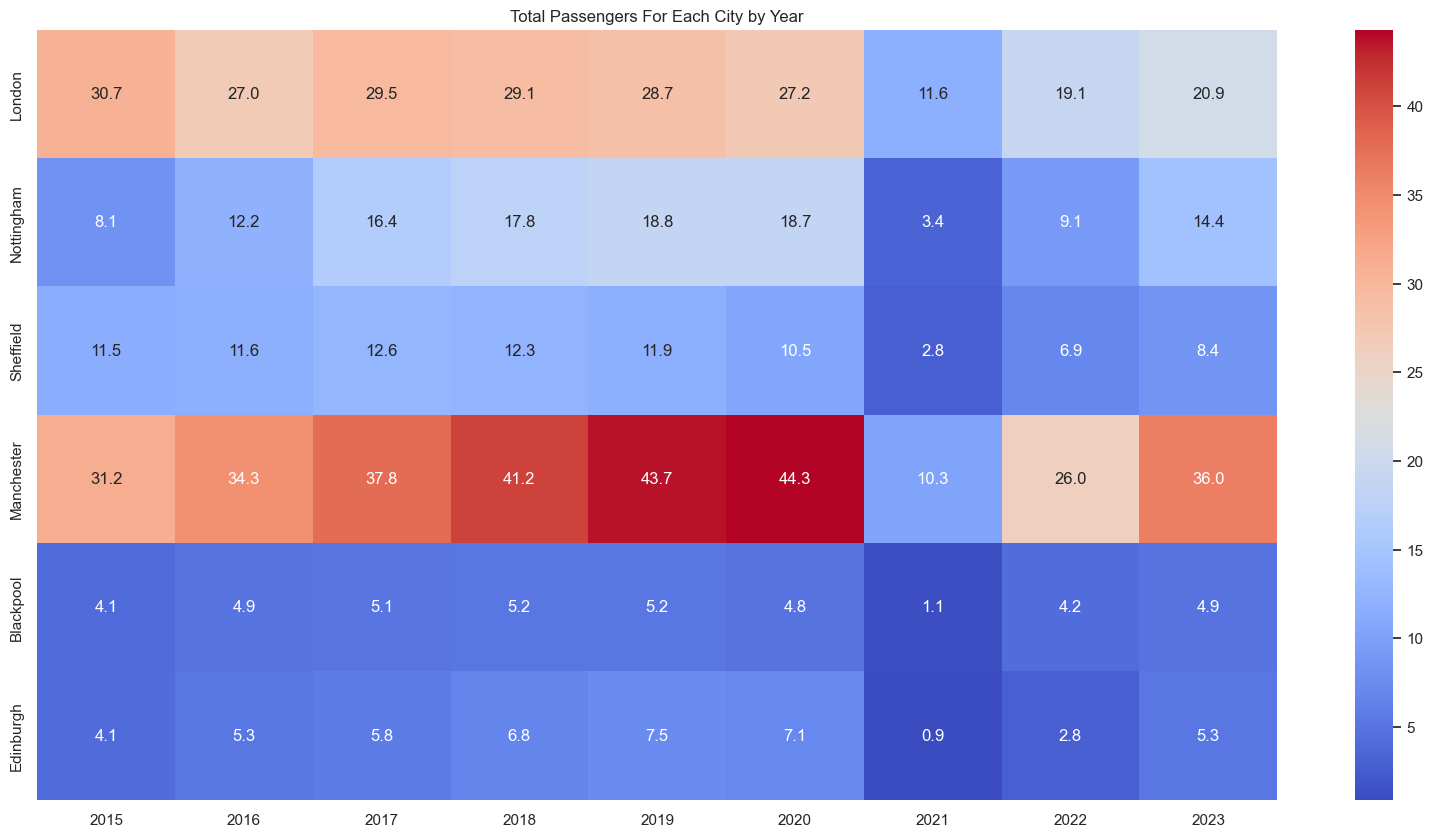

In [82]:
# finding the relations between the variables.
plt.figure(figsize=(20,10))
sns.heatmap(df_formatted_gb_totals,cmap="coolwarm", annot=True, fmt=".1f")
plt.title('Total Passengers For Each City by Year') #add title

# Descriptive statistics and appropriate visualisations in order to summarise the dataset

In [83]:
# Display first 5 rows of dataframe containing total passengers
df_luas_totals_all_data.head()

,STATISTIC,Statistic Label,TLIST(W1),Week,C03132V03784,Luas Line,UNIT,VALUE
0,TII03C01,Passenger Journeys,2019W01,2019 Week 01,-,All Luas lines,Number,549533.0
1,TII03C01,Passenger Journeys,2019W01,2019 Week 01,1,Red line,Number,274139.0
2,TII03C01,Passenger Journeys,2019W01,2019 Week 01,2,Green line,Number,275394.0
3,TII03C01,Passenger Journeys,2019W02,2019 Week 02,-,All Luas lines,Number,839022.0
4,TII03C01,Passenger Journeys,2019W02,2019 Week 02,1,Red line,Number,408199.0


In [84]:
# Check to see what data type the df variable is
type(df_luas_totals_all_data)

pandas.core.frame.DataFrame

In [85]:
# Check to see what data types the df variable holds
df_luas_totals_all_data.dtypes

STATISTIC           object
Statistic Label     object
TLIST(W1)           object
Week                object
C03132V03784        object
Luas Line           object
UNIT                object
VALUE              float64
dtype: object

In [86]:
# Check the dataframes column names
df_luas_totals_all_data.columns

Index(['STATISTIC', 'Statistic Label', 'TLIST(W1)', 'Week', 'C03132V03784',
       'Luas Line', 'UNIT', 'VALUE'],
      dtype='object')

In [87]:
pd.unique(df_luas_totals_all_data['Luas Line'])

array(['All Luas lines', 'Red line', 'Green line'], dtype=object)

In [88]:
# https://stackoverflow.com/questions/55394854/how-to-change-the-format-of-describe-output
# Format describe output
df_luas_totals_all_data['VALUE'].describe().apply("{0:.0f}".format)

count        771
mean      441653
std       268321
min        19727
25%       232184
50%       425858
75%       532630
max      1173473
Name: VALUE, dtype: object

In [89]:
df_luas_totals_all_data['VALUE'].min()
df_luas_totals_all_data['VALUE'].max()
df_luas_totals_all_data['VALUE'].mean()
df_luas_totals_all_data['VALUE'].std()
df_luas_totals_all_data['VALUE'].count()

771

In [90]:
# Group data by sex
grouped_data = df_luas_totals_all_data.groupby('VALUE')

In [91]:
# Summary statistics for all numeric columns by VALUE
#grouped_data.describe()
# Provide the mean for each numeric column by VALUE
grouped_data.mean(numeric_only=True)

""
VALUE
19727.0
19793.0
21298.0
21657.0
22958.0
...
1085573.0
1106246.0
1113668.0


In [92]:
# Make sure figures appear inline in Ipython Notebook
%matplotlib inline
# Create a quick bar chart
species_counts.plot(kind='bar');

NameError: name 'species_counts' is not defined